# **SEABORN**

In [224]:
import seaborn as sns

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
df = pd.read_csv("pokemon.csv")

In [227]:
df.head()

#        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3    Venusaur  Grass  Poison    525  80      82       83      100      100   
3  4  Charmander   Fire     NaN    309  39      52       43       60       50   
4  5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     65           1      False  
4     80           1      False

In [228]:
df = df.drop("#", axis=1)

## Pair Plot 

In [ ]:
# Alttaki satır çalışmazsa

# df.replace(True, 1, inplace=True)
# df.replace(False, 0, inplace=True)

# Üsteki 2 satırı çalıştır. Numpy versiyonun boolean türü verileri okumayan sürümde kalmış olabilir.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


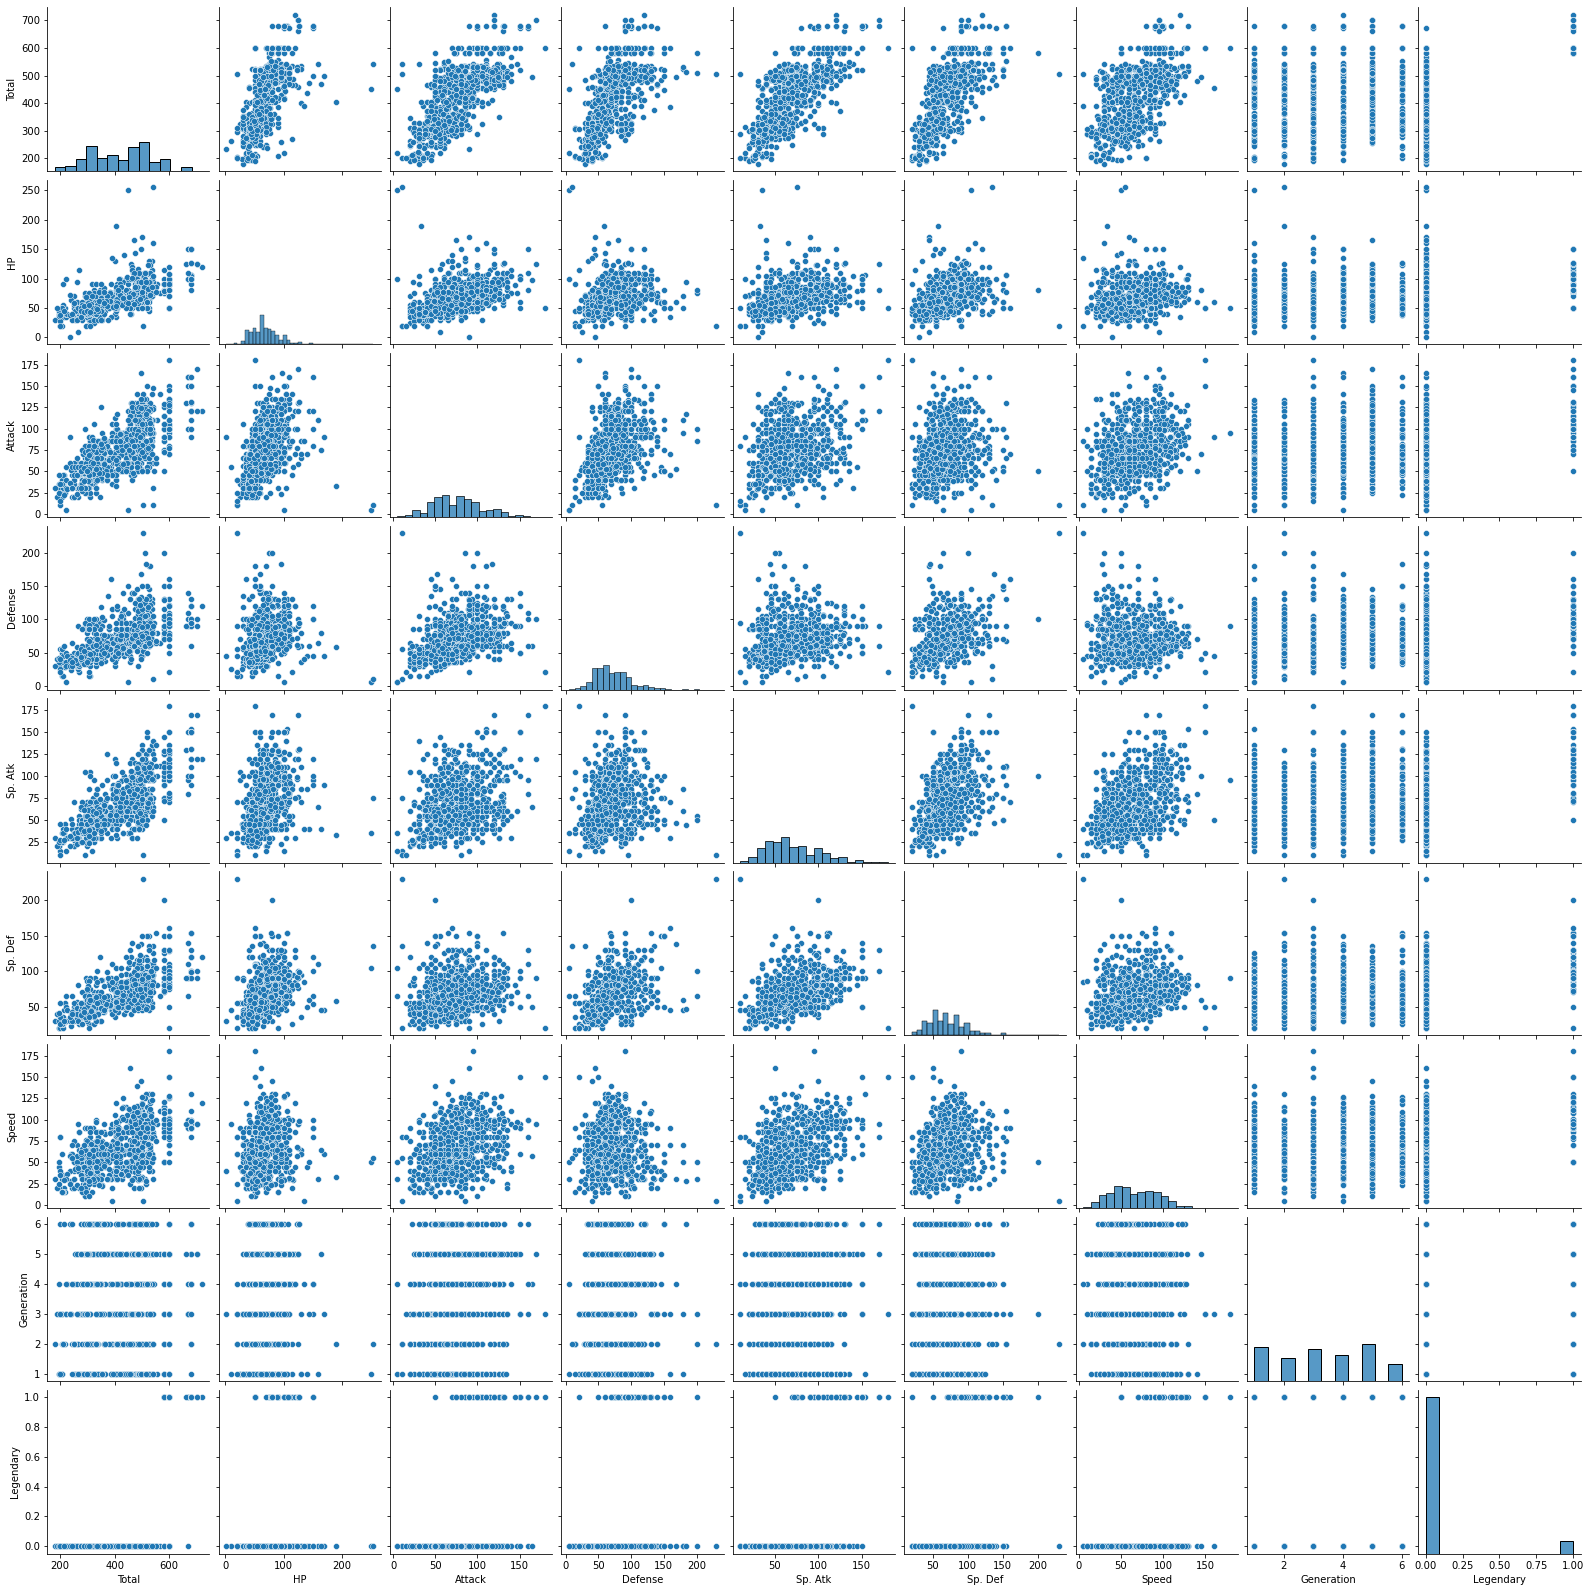

In [229]:
sns.pairplot(df);

<Figure size 4000x4000 with 0 Axes>

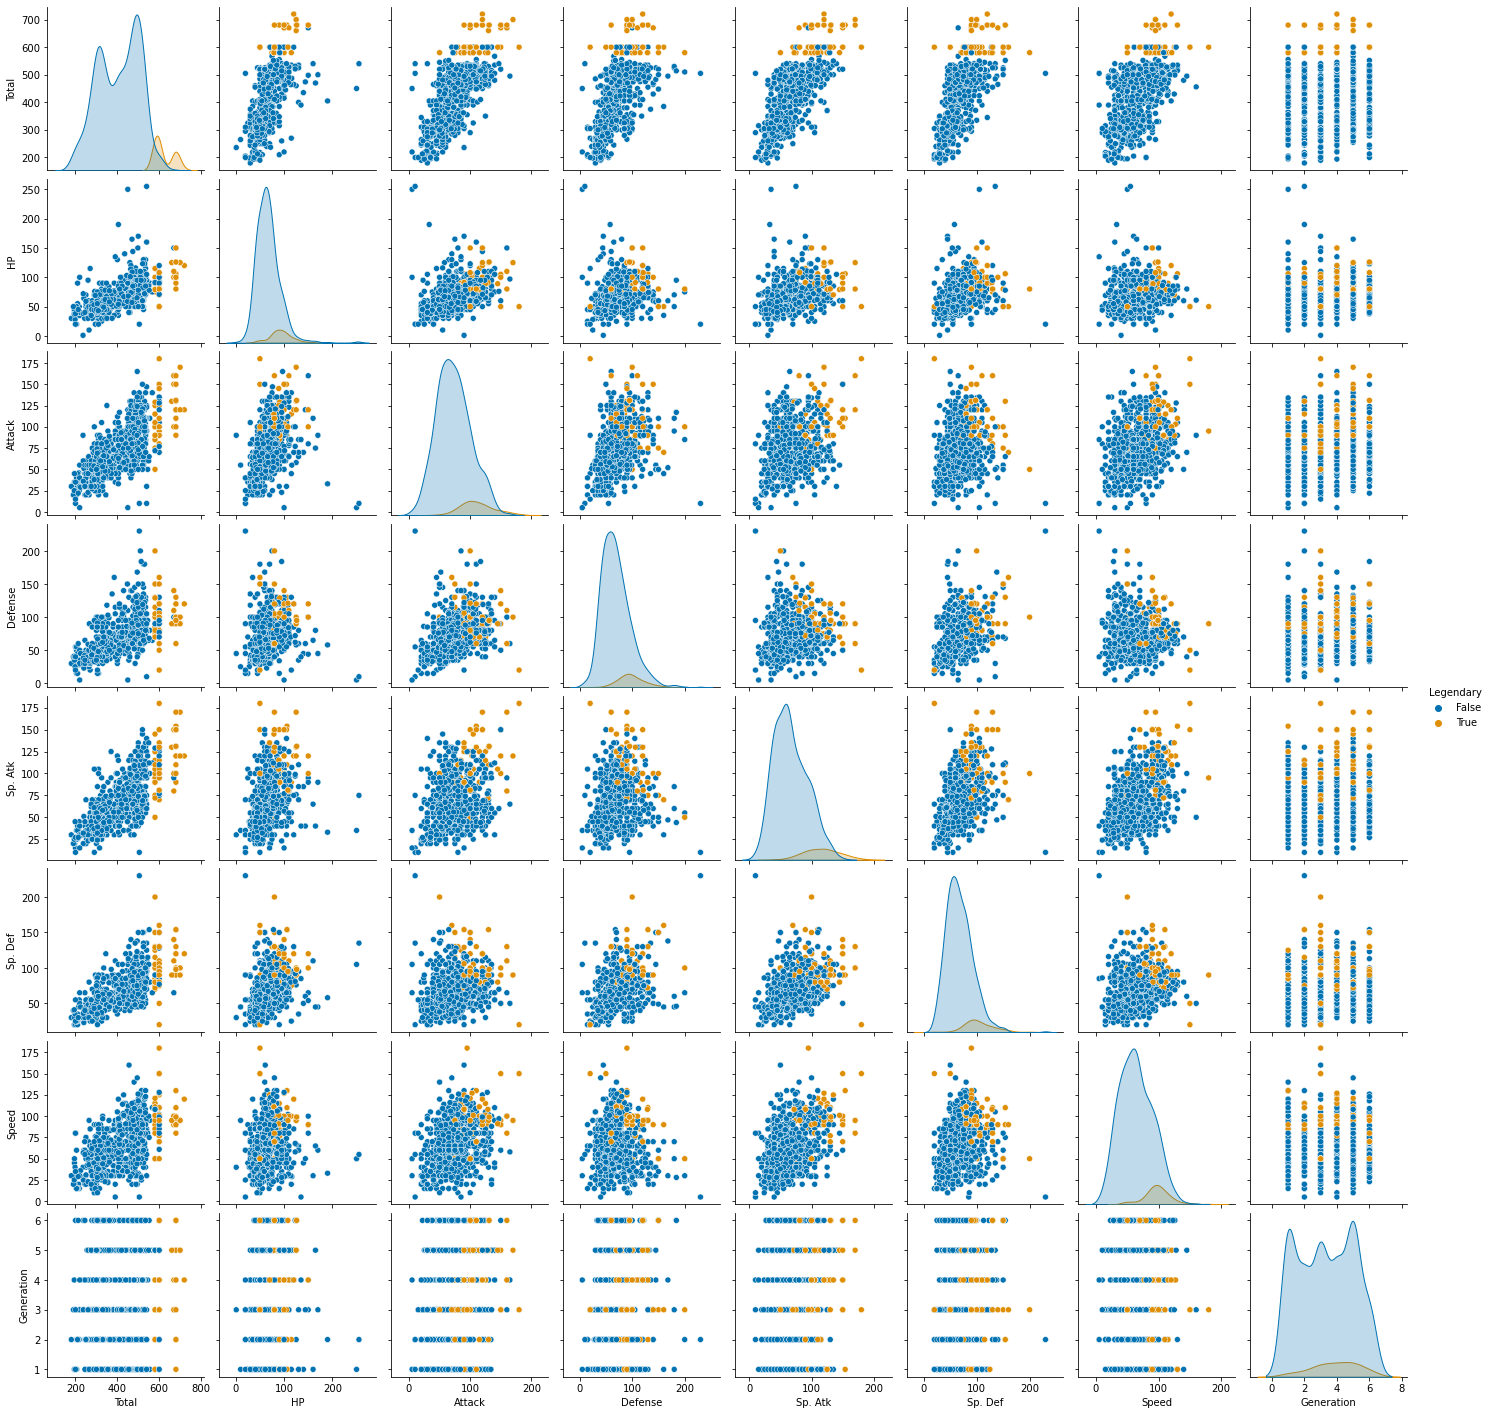

In [230]:
plt.figure(figsize=(20,20), dpi=200)
sns.pairplot(data=df, hue="Legendary", palette="colorblind");

<Figure size 4000x4000 with 0 Axes>

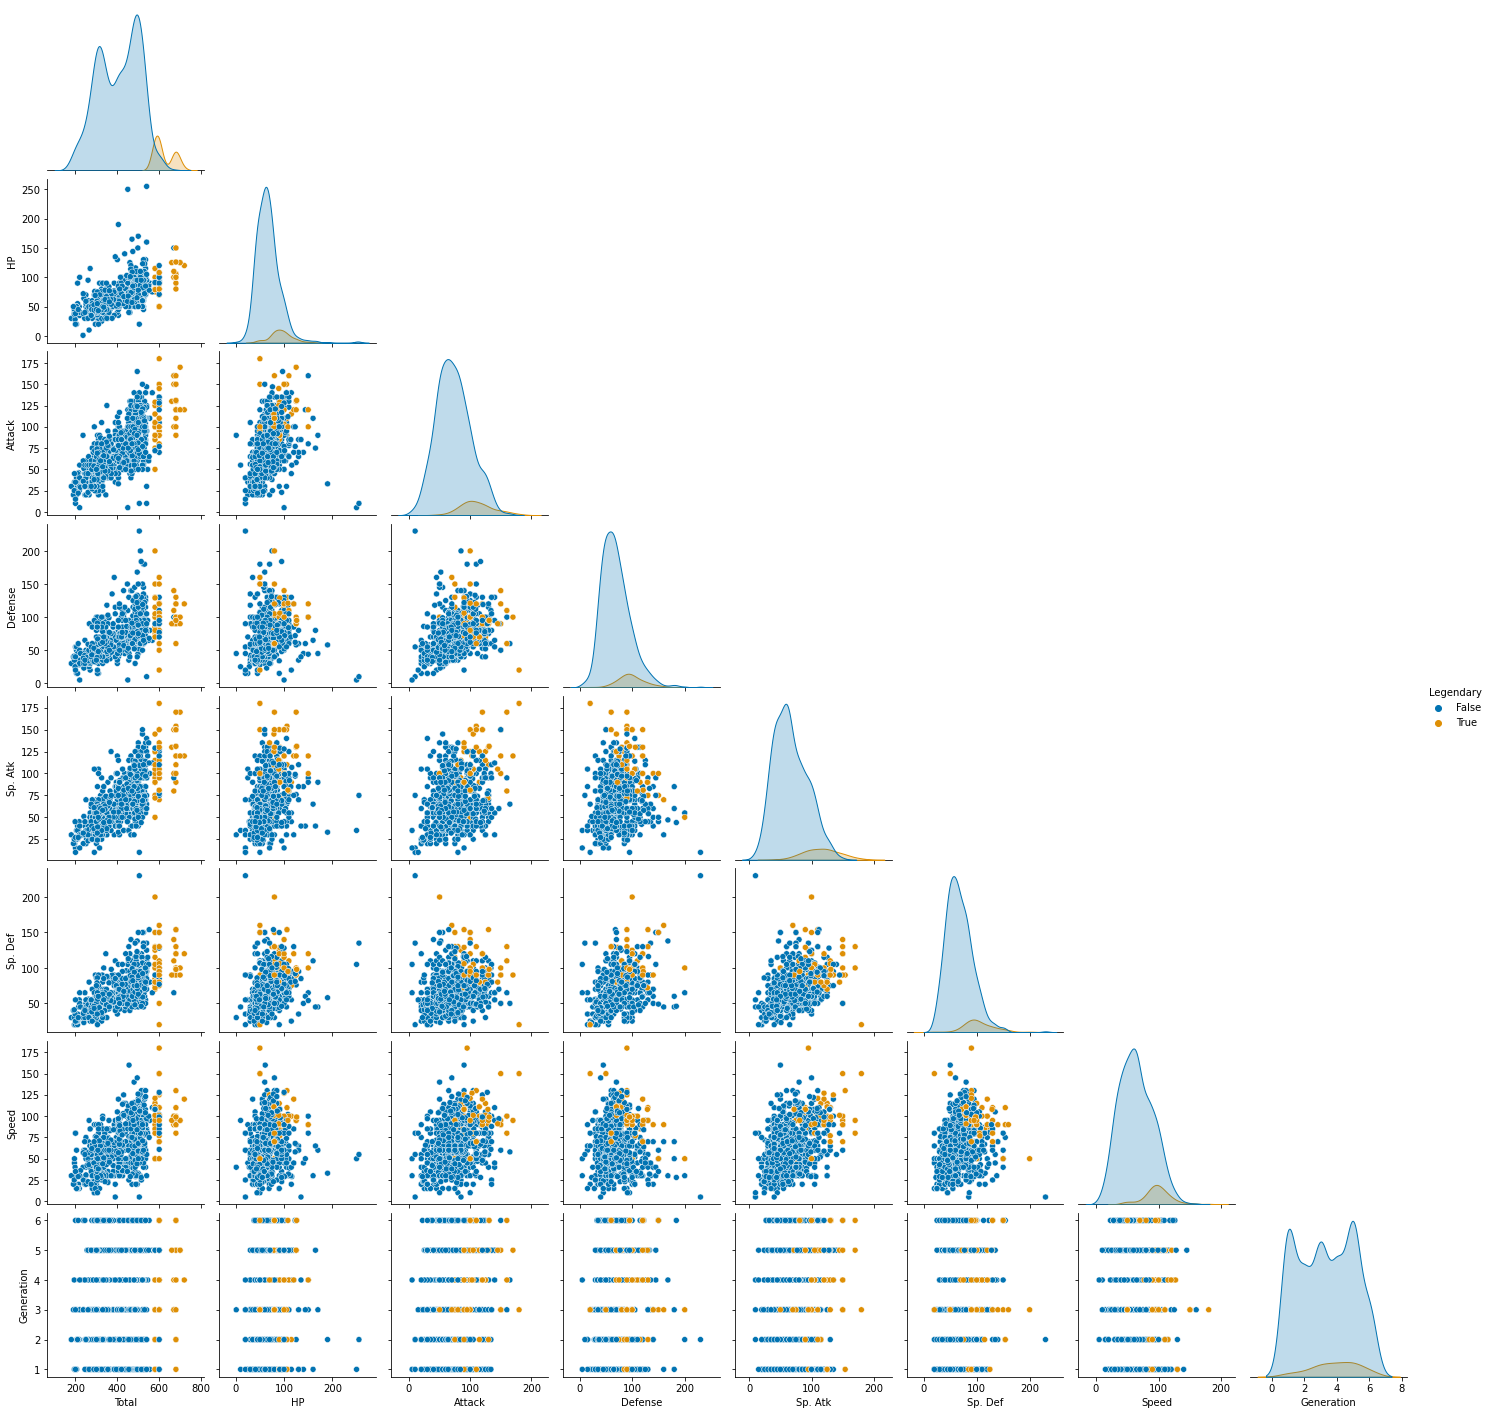

In [231]:
plt.figure(figsize=(20,20), dpi=200)
sns.pairplot(data=df, hue="Legendary",corner=True, palette="colorblind");

___
___

## Joint Plot

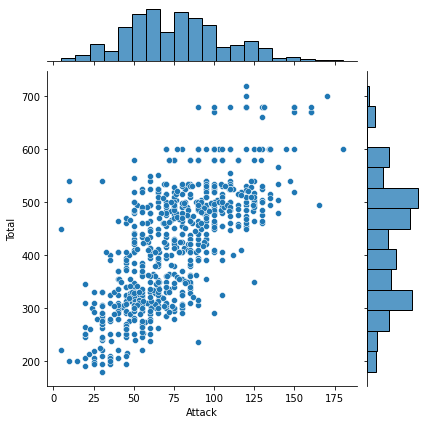

In [232]:
sns.jointplot(x="Attack",y="Total", data=df)

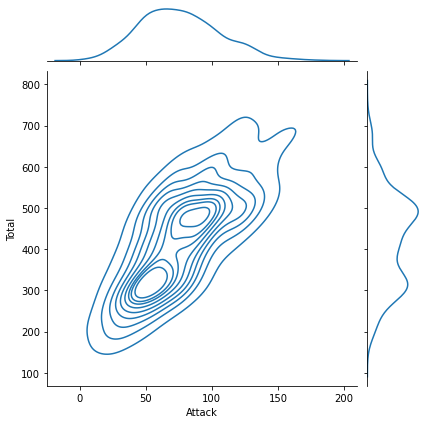

In [233]:
sns.jointplot(data=df, x="Attack", y="Total", kind="kde")

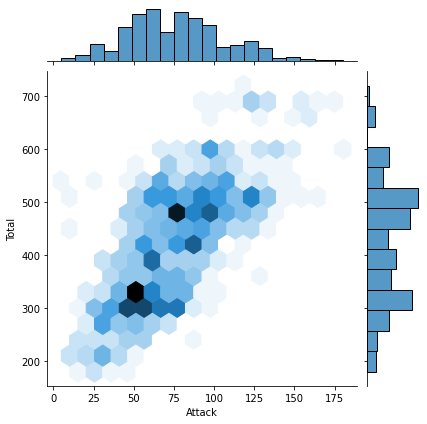

In [234]:
sns.jointplot(data=df, x="Attack", y="Total", kind="hex")

___
___

## Cat Plot

https://seaborn.pydata.org/generated/seaborn.catplot.html

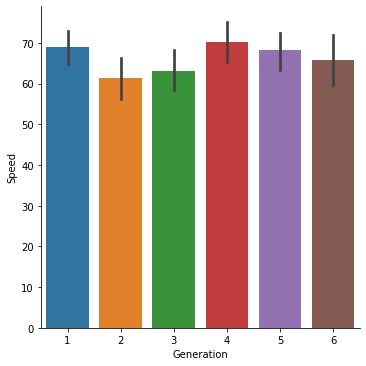

In [235]:
sns.catplot(data=df, x="Generation", y="Speed",kind="bar")

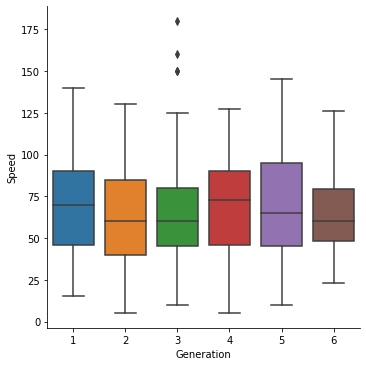

In [236]:
sns.catplot(data=df, x="Generation", y="Speed", kind="box")

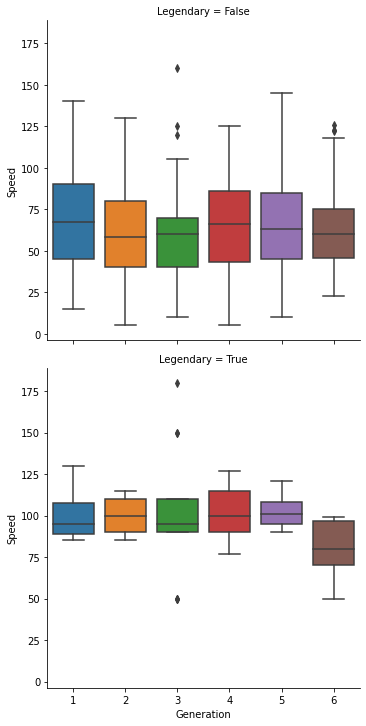

In [237]:
sns.catplot(data=df, x="Generation", y="Speed", kind="box", row="Legendary")

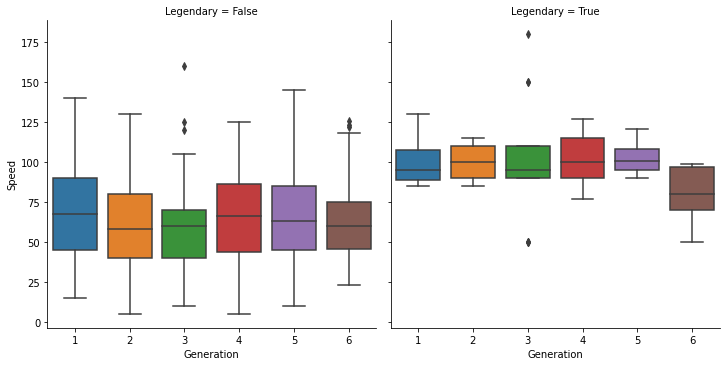

In [238]:
sns.catplot(data=df, x="Generation", y="Speed", kind="box", col="Legendary")

___
___

## Facet Grid

Detaylı bilgi için: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

<Figure size 2400x1200 with 0 Axes>

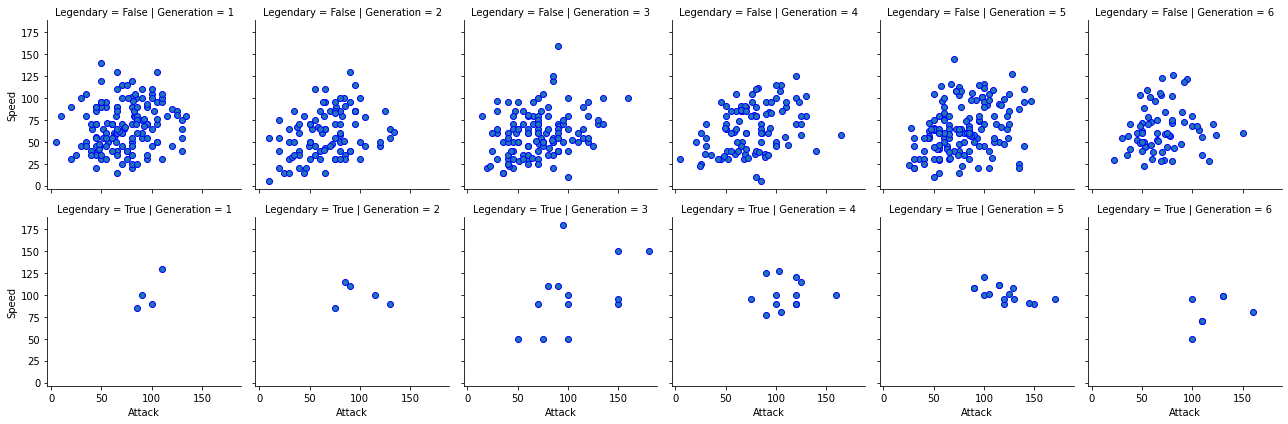

In [239]:
plt.figure(figsize=(12,6), dpi=200)
facet_grid= sns.FacetGrid(data=df, col="Generation", row="Legendary")
facet_grid= facet_grid.map(plt.scatter, "Attack", "Speed", edgecolor="b")

<Figure size 2400x1200 with 0 Axes>

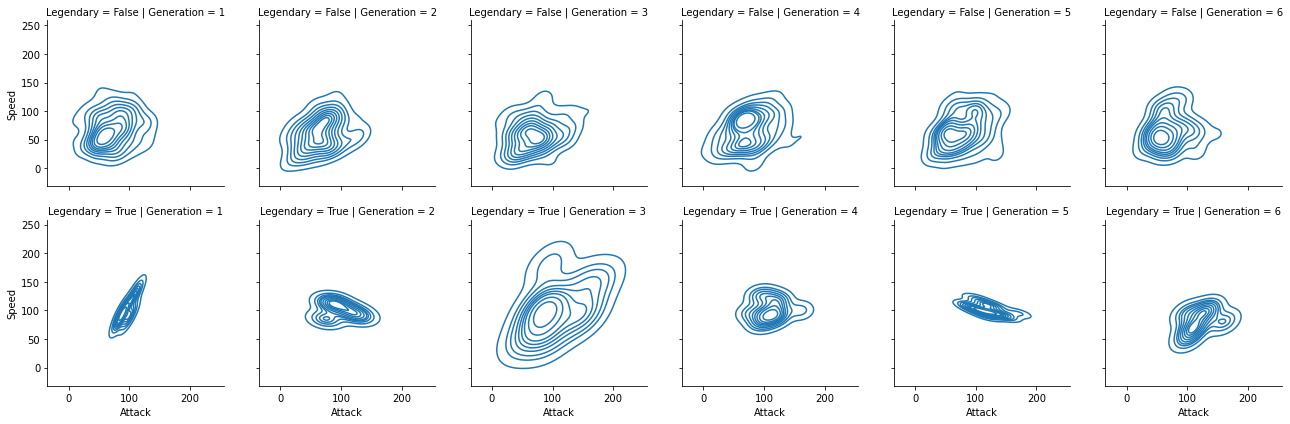

In [240]:
plt.figure(figsize=(12,6), dpi=200)
facet_grid= sns.FacetGrid(data=df, col="Generation", row="Legendary")
facet_grid= facet_grid.map(sns.kdeplot, "Attack", "Speed")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

___
___

## Pair Grid

Detaylı bilgi için: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


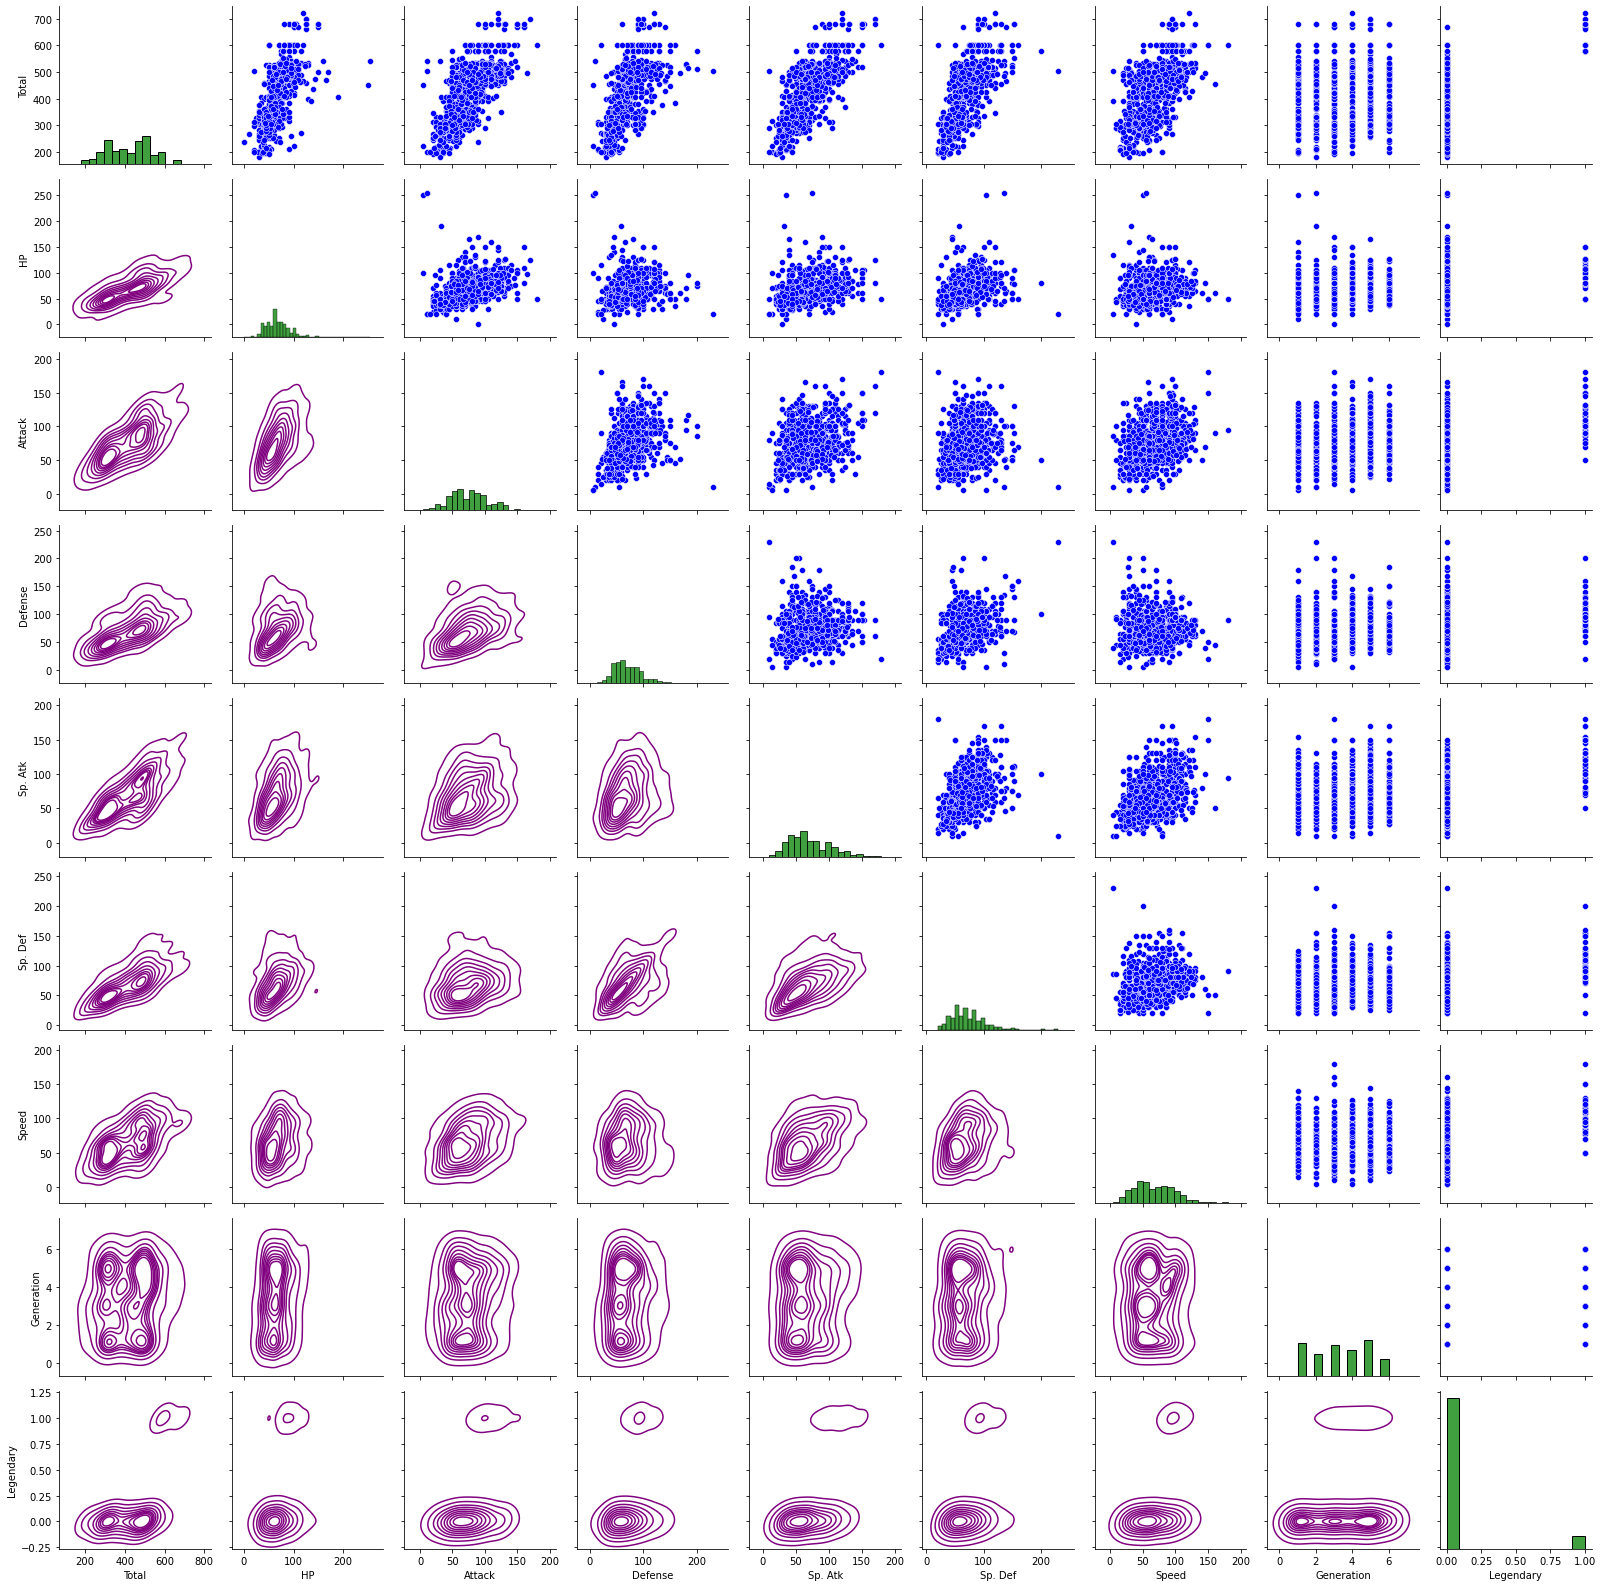

In [241]:
pair_grid = sns.PairGrid(df)
pair_grid = pair_grid.map_upper(sns.scatterplot, color="blue")
pair_grid = pair_grid.map_diag(sns.histplot, color="green")
pair_grid = pair_grid.map_lower(sns.kdeplot, color="purple");

___
___

## Heat Map

In [242]:
# help(sns.heatmap)

Not: yalnızca ndarray veri girilmeli

In [243]:
df = pd.read_csv("pokemon.csv")

In [244]:
df = df.drop(["#", "Type 1", "Type 2"], axis=1)

In [245]:
df = df.replace({
       "Legendary" : {
                     True : 1,
                     False : 0
       }
})

In [246]:
df = df.set_index("Name")

In [247]:
df

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Name                                                                        
Bulbasaur              318   45      49       49       65       65     45   
Ivysaur                405   60      62       63       80       80     60   
Venusaur               525   80      82       83      100      100     80   
Charmander             309   39      52       43       60       50     65   
Charmeleon             405   58      64       58       80       65     80   
...                    ...  ...     ...      ...      ...      ...    ...   
Zygarde                600  108     100      121       81       95     95   
Diancie                600   50     100      150      100      150     50   
HoopaHoopa Confined    600   80     110       60      150      130     70   
HoopaHoopa Unbound     680   80     160       60      170      130     80   
Volcanion              600   80     110      120      130       90     70   

                     Generation  Legendary  
Name                                        
Bulbasaur                     1          0  
Ivysaur                       1          0  
Venusaur                      1          0  
Charmander                    1          0  
Charmeleon                    1          0  
...                         ...        ...  
Zygarde                       6          1  
Diancie                       6          1  
HoopaHoopa Confined           6          1  
HoopaHoopa Unbound            6          1  
Volcanion                     6          1  

[742 rows x 9 columns]

In [248]:
heat_df = pd.concat([
    df.loc["Pikachu":"Pikachu"],
    df.loc["Gengar":"Gengar"],
    df.loc["Lugia":"Lugia"],
    df.loc["Mewtwo":"Mewtwo"],
    df.loc["Pidgey":"Pidgey"],
    df.loc["Kadabra":"Kadabra"],
    df.loc["Cubone":"Cubone"],
    df.loc["Scizor":"Scizor"],
    df.loc["Wurmple":"Wurmple"],
    df.loc["Lucario":"Lucario"],
    df.loc["Patrat":"Patrat"],
    df.loc["Yveltal":"Yveltal"]
])

In [249]:
heat_df

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
Name                                                                        
Pikachu    320   35      55       40       50       50     90           1   
Gengar     500   60      65       60      130       75    110           1   
Lugia      680  106      90      130       90      154    110           2   
Mewtwo     680  106     110       90      154       90    130           1   
Pidgey     251   40      45       40       35       35     56           1   
Kadabra    400   40      35       30      120       70    105           1   
Cubone     320   50      50       95       40       50     35           1   
Scizor     500   70     130      100       55       80     65           2   
Wurmple    195   45      45       35       20       30     20           3   
Lucario    525   70     110       70      115       70     90           4   
Patrat     255   45      55       39       35       39     42           5   
Yveltal    680  126     131       95      131       98     99           6   

         Legendary  
Name                
Pikachu          0  
Gengar           0  
Lugia            1  
Mewtwo           1  
Pidgey           0  
Kadabra          0  
Cubone           0  
Scizor           0  
Wurmple          0  
Lucario          0  
Patrat           0  
Yveltal          1

<AxesSubplot:ylabel='Name'>

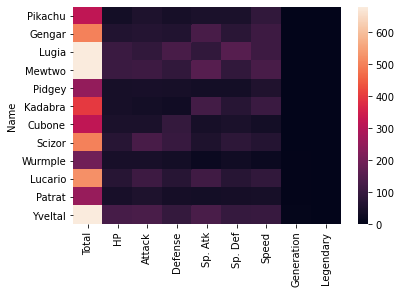

In [250]:
sns.heatmap(heat_df)

In [251]:
heat_df_2 = heat_df.drop(["Total","Generation","Legendary"], axis=1)

In [252]:
heat_df_2

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Name                                                  
Pikachu   35      55       40       50       50     90
Gengar    60      65       60      130       75    110
Lugia    106      90      130       90      154    110
Mewtwo   106     110       90      154       90    130
Pidgey    40      45       40       35       35     56
Kadabra   40      35       30      120       70    105
Cubone    50      50       95       40       50     35
Scizor    70     130      100       55       80     65
Wurmple   45      45       35       20       30     20
Lucario   70     110       70      115       70     90
Patrat    45      55       39       35       39     42
Yveltal  126     131       95      131       98     99

<AxesSubplot:ylabel='Name'>

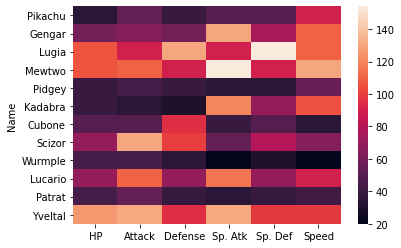

In [253]:
sns.heatmap(heat_df_2)

<AxesSubplot:ylabel='Name'>

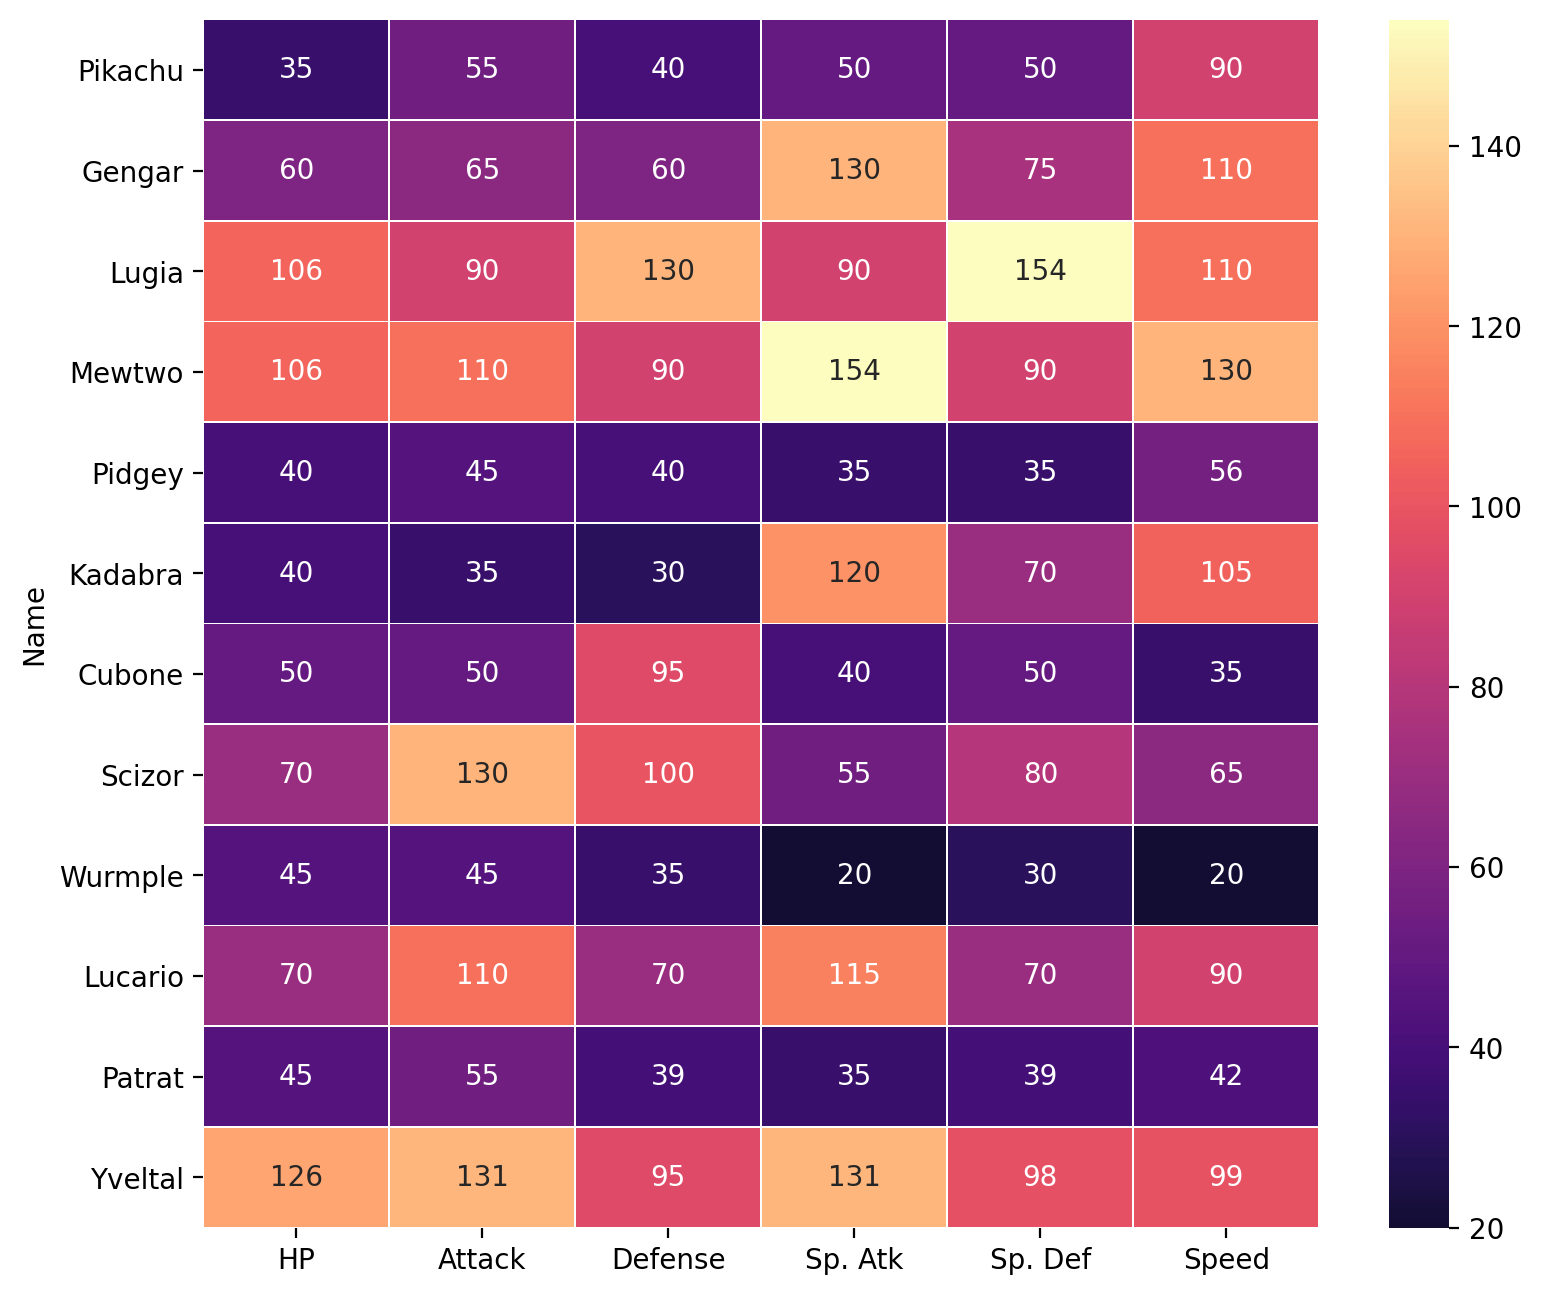

In [254]:
plt.figure(figsize=(9,8), dpi=200)
sns.heatmap(heat_df_2, cmap="magma", linewidths=0.3, annot=True, fmt=".0f", center= 80)

___
___

## Cluster Map

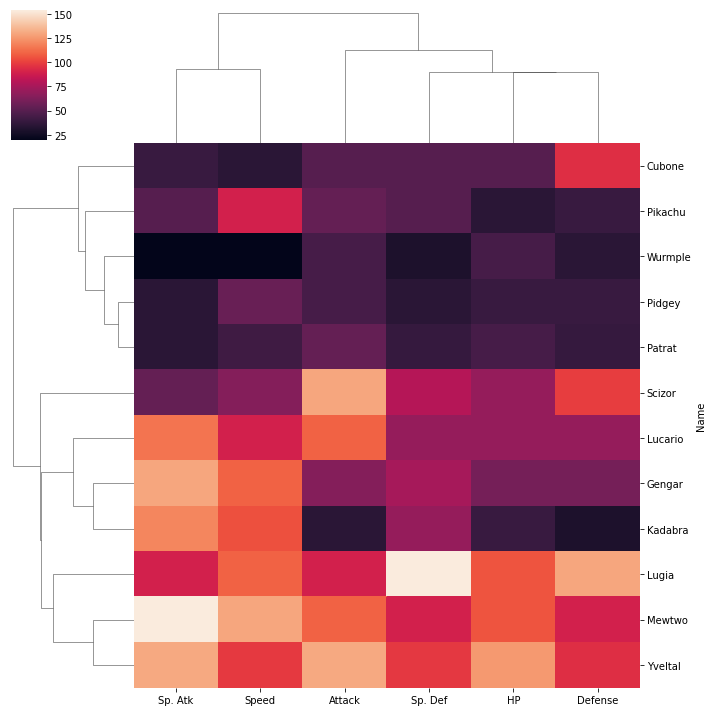

In [255]:
sns.clustermap(heat_df_2)

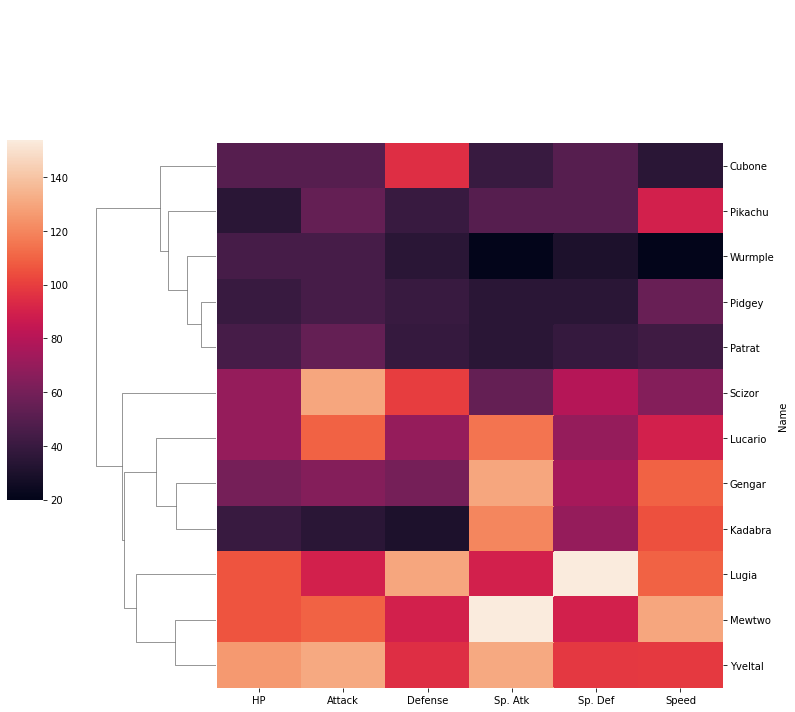

In [256]:
sns.clustermap(heat_df_2, col_cluster=False, cbar_pos=(-0.1, 0.3, 0.05, 0.5))

In [258]:
heat_df_2

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Name                                                  
Pikachu   35      55       40       50       50     90
Gengar    60      65       60      130       75    110
Lugia    106      90      130       90      154    110
Mewtwo   106     110       90      154       90    130
Pidgey    40      45       40       35       35     56
Kadabra   40      35       30      120       70    105
Cubone    50      50       95       40       50     35
Scizor    70     130      100       55       80     65
Wurmple   45      45       35       20       30     20
Lucario   70     110       70      115       70     90
Patrat    45      55       39       35       39     42
Yveltal  126     131       95      131       98     99

___
___

# **https://www.youtube.com/watch?v=TMc7CClpMcA**